<a href="https://colab.research.google.com/github/jeevankumar20/INFO_5731_Spring2023/blob/main/Jeevan_INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each Reviews in terms of other Reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 Reviews (abstracts, or tweets). 


In [1]:

import warnings
warnings.filterwarnings('ignore')
import nltk
import pandas as pd

#nltk.download()
df=pd.read_csv('/content/updatedreviews1.csv')
df

,Cleaned Reviews
0,strong suit first avatar movie sure story rete...
1,sequel design look match first film longer imp...
2,james cameron film impressive special effect c...
3,dumbest thing could possibly donesthey within ...
4,james cameron brings biggest disappointment ye...
...,...
794,start visually marvel scenery character design...
795,ive never seen beautiful cinematography vfx us...
796,absolutley flabbergasted cgi effect movie wate...
797,opened early thailand wednesday morning tuesda...


In [2]:
#1.1 - Trigrams
nltk.download('punkt')
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['Cleaned Reviews']:
    words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Create a generator object called 'tri_grams' that generates all possible trigrams from the list 'iterations' using the 'nltk.trigrams' function
tri_grams = nltk.trigrams(iterations)

# Create a frequency distribution object called 'frequency_dist' from the 'tri_grams' generator object using the 'nltk.FreqDist' function
frequency_dist = nltk.FreqDist(tri_grams)

# Display the 'frequency_dist' object
frequency_dist


FreqDist({('avatar', 'way', 'water'): 209, ('first', 'avatar', 'movie'): 23, ('like', 'first', 'one'): 19, ('ive', 'ever', 'seen'): 17, ('high', 'frame', 'rate'): 17, ('biggest', 'screen', 'possible'): 13, ('movie', 'james', 'cameron'): 13, ('like', 'first', 'movie'): 13, ('didnt', 'feel', 'like'): 12, ('way', 'water', 'one'): 11, ...})

In [4]:
#1.2 - Probability of Bi grams
# Import necessary libraries
from collections import Counter
import nltk

# Create a generator object called 'bi_grams' that generates all possible bigrams from the list 'iterations' using the 'nltk.bigrams' function
bi_grams = nltk.bigrams(iterations)

# Create a frequency distribution object called 'frequency_dist'
frequency_dist = nltk.FreqDist(bi_grams)

# Convert 'frequency_dist' into a dictionary called 'bi_grams_dict' using the 'dict'
bi_grams_dict = dict(frequency_dist)

# Iterate through each bigram in 'bi_grams_dict' and print the bigram and its probability using the 'count' function and string formatting
for word in bi_grams_dict:
    print(str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))


Streaming output truncated to the last 5000 lines.
('genesis', 'llike'):0.5
('llike', 'origin'):1.0
('origin', 'world'):0.5
('world', 'pure'):0.0022123893805309734
('pure', 'green'):0.05555555555555555
('green', 'clear'):0.14285714285714285
('clear', 'blue'):0.02127659574468085
('blue', 'flaw'):0.011627906976744186
('flaw', 'neytiri'):0.03333333333333333
('neytiri', 'play'):0.0070921985815602835
('play', 'angry'):0.019230769230769232
('angry', 'woman'):0.1111111111111111
('woman', 'role'):0.07692307692307693
('role', 'much'):0.021739130434782608
('much', 'departed'):0.002127659574468085
('departed', 'first'):0.5
('dimensional', 'thats'):0.09090909090909091
('thats', 'bad'):0.00546448087431694
('focus', 'others'):0.015384615384615385
('others', 'emerging'):0.030303030303030304
('emerging', 'star'):0.5
('star', 'expanding'):0.0125
('expanding', 'universechildren'):0.1111111111111111
('universechildren', 'child'):1.0
('child', 'worst'):0.006896551724137931
('part', 'thin'):0.0032679738562

In [5]:
#1.3 Noun Phrases and relative probabilities of each Cleaned Reviews in terms of other Cleaned Reviewss
whole_dataset = ''
index = []
i = 1
for line in df['Cleaned Reviews']:
    whole_dataset = whole_dataset + line
    value = 'Reviews-' + str(i)
    index.append(value)
    i=i+1

In [8]:
from textblob import TextBlob
import pandas as pd

noun_phrases = []
frequency = []
whole_dataset = ' '.join(df['Cleaned Reviews']) # concatenate all the text into a single string
for line in df['Cleaned Reviews']:
    blob = TextBlob(line)
    for nouns in blob.noun_phrases:
        noun_phrases.append(nouns)
for word in noun_phrases:
    noun_phrases_freq = []
    word_count = whole_dataset.count(word)
    for line in df['Cleaned Reviews']:
        if word_count == 0:
            noun_phrases_freq.append(0.0)
        else:
            noun_phrases_freq.append(line.count(word) / word_count)
    frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = df.index
noun_phrases_df

,strong suit,avatar movie,sure story,pocahontas scifi context etc rate,sophisticated plot,sure way water,bad experience effect,fine production superb dare,lengthy part,production day,...,interest clothing,skin sun plant animal pandora character monkey boy spider,question walk,clothes shoe story,sense jake,abandon itas,numerous review,cgi filler reason,large sum money film,demo reel tv
0,0.333333,0.014286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the Cleaned Reviewss, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [9]:
# Import necessary libraries
import math
import pandas as pd

# Define a function called 'tf_idf_value' that takes in a sentence and a word and returns the TF-IDF value of the word in the sentence
def tf_idf_value(sentence, word):
    # Get the size of the sentence (i.e., the number of words in the sentence)
    size = len(sentence.split(" "))
    # Calculate the TF value of the word in the sentence
    tf_value = sentence.count(word) / size
    # Calculate the IDF value of the word in the sentence
    idf_value = 0
    if (tf_value != 0):
        idf_value = math.log(size) / sentence.count(word)
    else:
        return 0
    # Return the TF-IDF value of the word in the sentence
    return tf_value * idf_value

# Get all the sentences from the 'Cleaned Reviews' column of the 'df' DataFrame
sentences = df["Cleaned Reviews"].values.tolist()

# Create a set called 'tokens_list' that contains all the unique words in 'sentences'
tokens_list = set([j for i in sentences for j in i.split(" ")])

# Create a DataFrame called 'tf_idf' with the unique words in 'tokens_list' as the first column ('token')
tf_idf = pd.DataFrame(tokens_list, columns=["token"])

# Iterate through each sentence in 'sentences' and calculate the TF-IDF value of each word in the sentence, storing the results in the 'tf_idf' DataFrame
count = 0
for i in sentences:
    tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
    count += 1

# Display the 'tf_idf' DataFrame
tf_idf


,token,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
0,decadeplus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,secondary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,squanders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,glance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,stretched,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,forthe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11898,quietly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11899,accountability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11900,followuplets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [13]:
# Import necessary libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define a query sentence
query_sentence = 'saw first one fantastic wasnt sure expect given mix rating took risk cinema room seat occupied film one couple left part way thoughit became clearer film based character dialogue target audience young teen parentssomething applauded creativity wildlife animationsfight scene created excitement didnt lift film muddy water really dull plot spoilt film made tiresome watchnow im wondering many star rating real making question trust imdb.'

# Tokenize the query sentence into a list of words
X_list = word_tokenize(query_sentence)

# Get the list of stop words in English
sw = stopwords.words('english')

# Create a set of words in the query sentence that are not stop words
X_set = {w for w in X_list if not w in sw}


In [14]:
# Define a function to compute the vector of two sets
def compute_vector(X_set, Y_set):
    # Combine the two sets to create a set of all unique words
    rvector = X_set.union(Y_set)
    
    # Create two lists of binary values indicating presence/absence of each word in the sets
    l1 = []; l2 = []
    for w in rvector:
        if w in X_set:
            l1.append(1)
        else:
            l1.append(0)
        if w in Y_set:
            l2.append(1)
        else:
            l2.append(0)
    
    # Return the set of all unique words and the two lists of binary values
    return rvector, l1, l2


In [15]:
# Define a function to compute the cosine similarity of two vectors
def compute_cosine(rvector, l1, l2):
    # Compute the dot product of the two vectors
    c = 0
    for i in range(len(rvector)):
        c += l1[i]*l2[i]
    
    # Compute the cosine similarity using the dot product and the lengths of the two vectors
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    
    # Return the cosine similarity
    return cosine


In [16]:
# Initialize an empty list to hold the cosine similarity values
similarity_list = []

# Loop over each review in the dataset
for sentence in df['Cleaned Reviews']:
    # Tokenize the review and remove stop words
    Y_list = word_tokenize(sentence)
    Y_set = {w for w in Y_list if not w in sw}
    
    # Compute the cosine similarity between the query sentence and the review
    rvector, l1, l2 = compute_vector(X_set, Y_set)
    try:
        similarity = compute_cosine(rvector, l1, l2)
    except ZeroDivisionError:
        similarity = 'None'
    
    # Add the similarity value to the list
    similarity_list.append(similarity)

# Create a new dataframe to hold the cosine similarity values
cosine_dataframe = pd.DataFrame(list(zip(df['Cleaned Reviews'],similarity_list)), columns=['Cleaned Reviews','Cosine Similarity'])
cosine_dataframe

,Cleaned Reviews,Cosine Similarity
0,strong suit first avatar movie sure story rete...,0.138409
1,sequel design look match first film longer imp...,0.084639
2,james cameron film impressive special effect c...,0.127802
3,dumbest thing could possibly donesthey within ...,0.084270
4,james cameron brings biggest disappointment ye...,0.085656
...,...,...
794,start visually marvel scenery character design...,0.047316
795,ive never seen beautiful cinematography vfx us...,0.038490
796,absolutley flabbergasted cgi effect movie wate...,0.090045
797,opened early thailand wednesday morning tuesda...,0.083045


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [17]:
import gensim
import nltk
import pandas as pd

# Check for missing values
if df.isnull().values.any():
    print("Warning: missing values detected in dataframe")

# Tokenize the reviews into sentences
sentences = [nltk.sent_tokenize(review) for review in df['Cleaned Reviews']]

sentences



[['strong suit first avatar movie sure story retelling pocahontas scifi context etc rate one straight expect sophisticated plot something substantial like expected story nothing worth mention remarkable fore sure way water bad experience effect fine production superb dare say liked first one like one likely entertained trip lengthy part cutting like many production day would done magick experience way water also sensation new style like movie like first matrix sin city avatar provided gone know get gotta confess slightly bored sometimes like watching cinematic well made computer game humble opinion medium mostly overpraise work james cameron like dune remake denis villeneuve eyecandy yes cinematic masterpiece'],
 ['sequel design look match first film longer impact ocean setting brings new creature u marvel isnt breathtakingly new year agothere lot action set piece great watch although feel either repetitive borrowed previous cameron film like titanicfor bringing back grace character ev

In [18]:
from gensim.models import Word2Vec

# train model
model = Word2Vec(sentences, min_count=1, vector_size=300)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
# access vector for one word
print(model.wv.get_vector('strong suit first avatar movie sure story retelling pocahontas scifi context etc rate one straight expect sophisticated plot something substantial like expected story nothing worth mention remarkable fore sure way water bad experience effect fine production superb dare say liked first one like one likely entertained trip lengthy part cutting like many production day would done magick experience way water also sensation new style like movie like first matrix sin city avatar provided gone know get gotta confess slightly bored sometimes like watching cinematic well made computer game humble opinion medium mostly overpraise work james cameron like dune remake denis villeneuve eyecandy yes cinematic masterpiece'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=796, vector_size=300, alpha=0.025>
[-1.89403736e-03 -1.71311980e-03 -1.05427427e-03 -2.11903010e-03
 -6.95530965e-04 -7.83532043e-04 -1.75282359e-03  4.15030314e-04
  1.50865829e-03 -1.13417546e-03  3.01818852e-03  1.68740753e-05
 -7.55550864e-04  2.67458986e-03 -2.05041049e-03  8.81139422e-05
  2.35092803e-03 -8.10641854e-04  5.34658029e-04 -1.10983651e-03
 -2.06791959e-03 -5.00414346e-04  1.60705601e-03 -1.04985236e-04
  5.13814681e-04 -2.54303683e-03  2.17813533e-03 -3.24290188e-04
  1.33986119e-03 -2.59525259e-03 -2.76811398e-03  2.56639044e-03
 -1.28619268e-03 -2.38387706e-03 -1.30864221e-03 -2.19643116e-04
  5.13239705e-04 -3.11681000e-03  4.50222491e-04 -1.27621053e-03
  8.08496494e-04  6.40084327e-04  2.15535960e-03 -3.19138373e-04
 -7.87192956e-04 -2.58456543e-03 -3.24124773e-03  1.16390025e-03
 -6.12349890e-04 -2.88889022e-03 -2.20989296e-03 -2.20133341e-03
 -9.14302247e-04  2.51271529e-03  2.57942872e-03 -3.13194795e-03
 -2.59374012e-03 -3.21904896e-03  5.9714

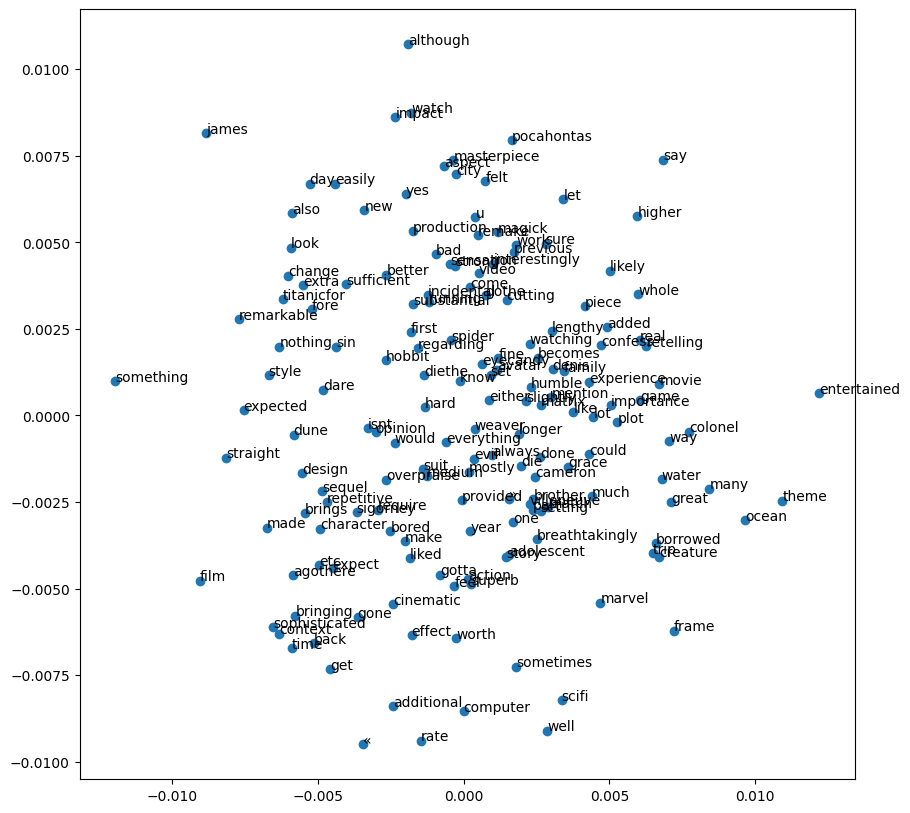

In [19]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

#Giving only few sentences as the model since the plot is not rendering.
sample_sentence = [["strong", "suit", "first", "avatar", "movie", "sure", "story", "retelling", "pocahontas", "scifi", "context", "etc", "rate", "one", "straight", "expect", "sophisticated", "plot", "something", "substantial", "like", "expected", "story", "nothing", "worth", "mention", "remarkable", "fore", "sure", "way", "water", "bad", "experience", "effect", "fine", "production", "superb", "dare", "say", "liked", "first", "one", "like", "one", "likely", "entertained", "trip", "lengthy", "part", "cutting", "like", "many", "production", "day", "would", "done", "magick", "experience", "way", "water", "also", "sensation", "new", "style", "like", "movie", "like", "first", "matrix", "sin", "city", "avatar", "provided", "gone", "know", "get", "gotta", "confess", "slightly", "bored", "sometimes", "like", "watching", "cinematic", "well", "made", "computer", "game", "humble", "opinion", "medium", "mostly", "overpraise", "work", "james", "cameron", "like", "dune", "remake", "denis", "villeneuve", "eyecandy", "yes", "cinematic", "masterpiece"],
                   ["sequel", "design", "look", "match", "first", "film", "longer", "impact", "ocean", "setting", "brings", "new", "creature", "u", "marvel", "isnt", "breathtakingly", "new", "year", "agothere", "lot", "action", "set", "piece", "great", "watch", "although", "feel", "either", "repetitive", "borrowed", "previous", "cameron", "film", "like", "titanicfor", "bringing", "back", "grace", "character", "evil", "colonel", "felt", "much", "one", "grace", "sigorney", "weaver", "would", "sufficient", "colonel", "could", "easily", "brother", "like", "die", "hard", "although", "would", "require", "additional", "story", "change", "regarding", "adolescent", "«", "spider", "»", "character", "would", "better", "whole", "«", "importance", "family", "»", "theme", "running", "everything", "much", "well", "let", "make", "sure", "incidental", "character", "diethe", "higher", "frame", "rate", "aspect", "added", "nothing", "extra", "time", "made", "feel", "like", "video", "like", "real", "film", "although", "interestingly", "video", "feel", "always", "like", "hobbit", "film", "would", "come", "gothe", "story", "film", "becomes"]]
# train model
model = Word2Vec(sample_sentence, min_count=1, vector_size=300)

# extract all unique words
unique_words = list(model.wv.index_to_key)

# create 2D numpy array for word embeddings
embeddings = model.wv[unique_words]

# reduce dimensionality to 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)


fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
for i, word in enumerate(unique_words):
    ax.annotate(word, xy=(embeddings_2d[i,0], embeddings_2d[i,1]))
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each Cleaned Reviews (abstract or tweet) you collected in detail, and annotate each Cleaned Reviews with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [20]:
# The GitHub link of your final csv file
#https://github.com/jeevankumar20/INFO_5731_Spring2023/blob/main/annotated_reviews.csv



